# Project

**Task: Predict the price and cut of diamonds. Do 2 predictions!**

## Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Understanding

In [2]:
diamonds = pd.read_csv("diamonds_FSAI_SoSe22.csv", index_col="Unnamed: 0")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68


In [3]:
# show an overview of the key descriptive stats
diamonds.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


**carat**: Carat weight of the diamond  
**cut**: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very
Good, Premium, Ideal  
**color**: Color of the diamond, with D being the best and J the worst  
**clarity**: How obvious inclusions are within the diamond: (I1 (worst), SI2, SI1, VS2, VS1, VVS2,
VVS1, IF (best))  
**depth**: depth %. The height of a diamond, measured from the culet to the table, divided by
its average girdle diameter  
**table**: table%. The width of the diamond's table expressed as a percentage of its average
diameter  
**price**: the price of the diamond in US dollars  
**x**: length mm  
**y**: width mm  
**z**: depth mm  

In [4]:
# identify number of rows with missing values
len(diamonds)-len(diamonds.dropna())

0

No missing values in datasheet.

In [5]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Data Analysis & Visualization

In [6]:
# understanding data
# show sum of rows and columns
diamonds.shape

(45849, 10)

In [7]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Removing Outliers

In [29]:
diamonds.query("x==0 or y==0 or z==0").index

Int64Index([  782,  1339,  3496, 10574, 11329, 12084, 12633, 14338, 17835,
            22503, 25915, 26749, 30729, 36841, 37710, 41284, 44855],
           dtype='int64')

In [41]:
diamonds.drop(diamonds.query("x==0 or y==0 or z==0").index, inplace=True)
diamonds.shape

(45832, 10)

<AxesSubplot:xlabel='x'>

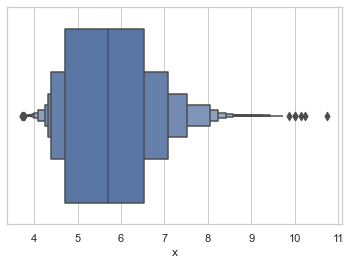

In [48]:
sns.boxenplot(x=diamonds["x"])

<AxesSubplot:xlabel='y'>

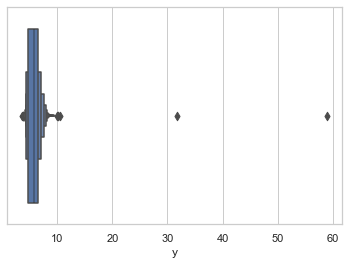

In [49]:
sns.boxenplot(x=diamonds["y"])

<AxesSubplot:xlabel='z'>

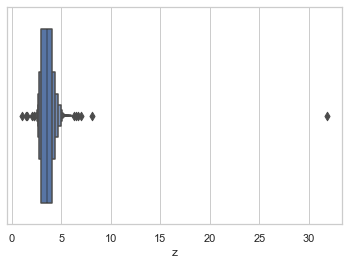

In [50]:
sns.boxenplot(x=diamonds["z"])

In [62]:
#diamonds.query("x>8.5 or z>6 or y>10").index
diamonds.query("x>9.8").index

Int64Index([3497, 7479, 13992, 20854, 38933, 41338], dtype='int64')

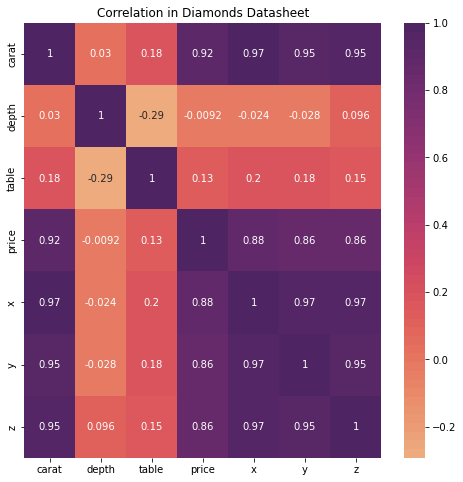

In [11]:
plt.figure(figsize=(8, 8))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.color_palette("flare", 50), annot=True)
plt.title("Correlation in Diamonds Datasheet")
plt.show()

Dark red rectangles give a hint about correlations. Thus we see a value close to 1 for carat & price, as well as for carat and the x, y, z variables.

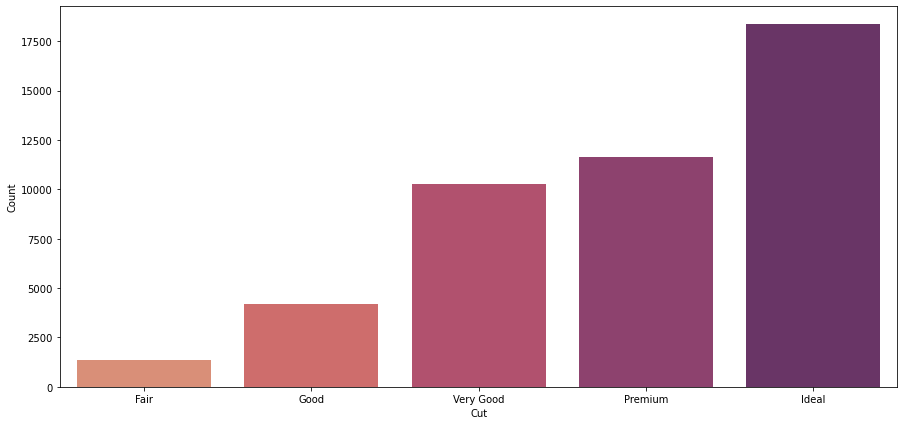

In [12]:
# Increasing quality order
# Fair (least best) < Good < Very Good < Premium < Ideal

plt.figure(figsize= (15, 7))
sns.countplot(x= "cut", data= diamonds, palette= sns.color_palette("flare", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

We see the dataset contains mostly diamonds with an ideal cut and least with only a fair cut. Premium and very good cut have a rather similar count, and a good cut has the second lowest count in the data set.

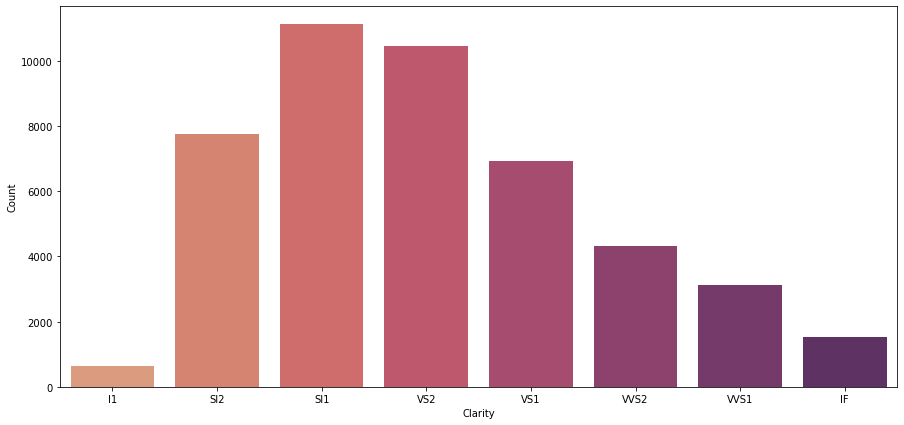

In [13]:
# Increasing quality order 
# I1 (Worst) < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF (best)
plt.figure(figsize= (15, 7))
sns.countplot(x= "clarity", data= diamonds,
              order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "flare")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.show()

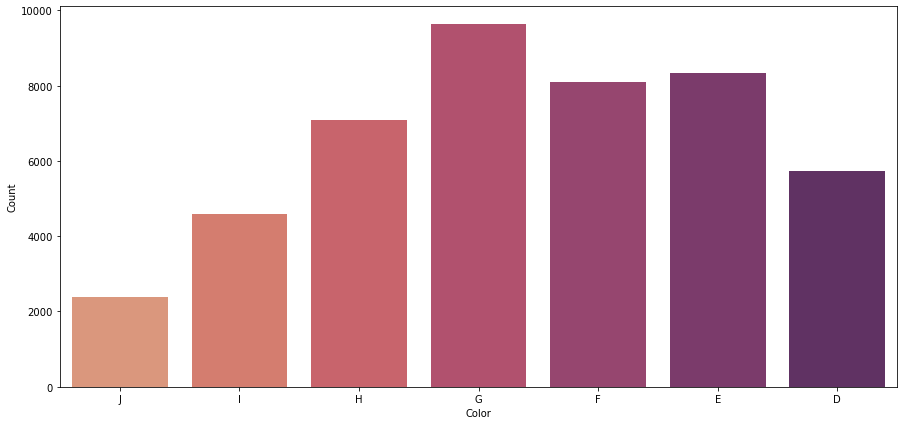

In [14]:
# Increasing quality order
# J (Worst) < I < H < G < F < E < D (best)
plt.figure(figsize= (15, 7))
sns.countplot(x= "color", data= diamonds, palette= "flare", order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

In [15]:
sns.set_theme(style="whitegrid")

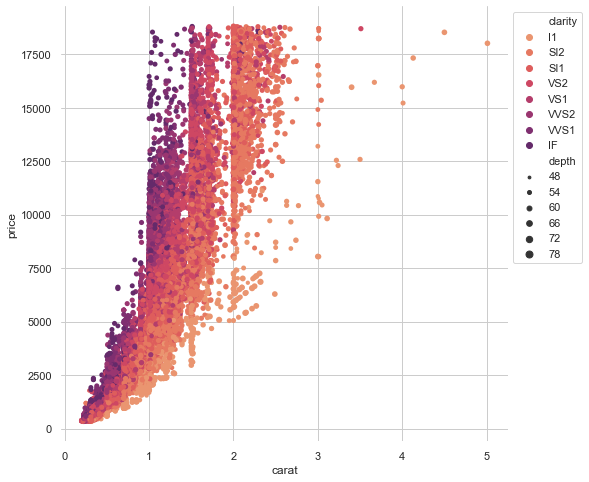

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
# remove spines
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="flare",
                hue_order=clarity_ranking,
                sizes=(1, 50), linewidth=0,
                data=diamonds, ax=ax, legend="brief")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

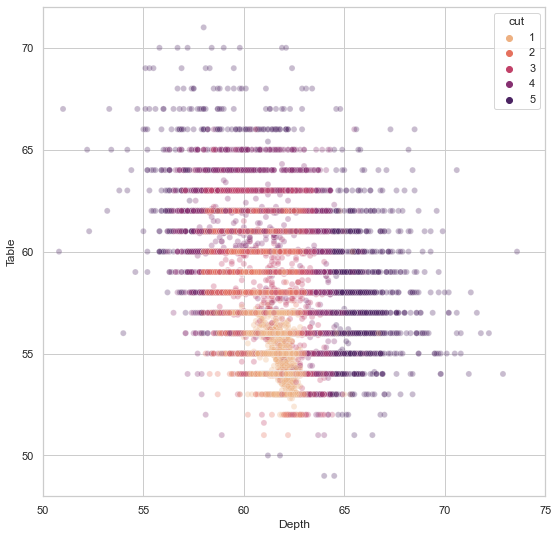

In [179]:
plt.figure(figsize= (9, 9))
sns.scatterplot(x= "depth", y= "table", data= diamonds, y_jitter=200,
                alpha=.3, hue= "cut", palette="flare")
plt.xlabel("Depth")
plt.ylabel("Table")
plt.xlim(50, 75)
plt.ylim(48, 72)
plt.show()

In [18]:
import numpy as np
import scipy.stats as st
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

### Create dummy variables

In [19]:
diamonds.loc[diamonds['cut'] == 'Fair', 'cut'] = 1
diamonds.loc[diamonds['cut'] == 'Good', 'cut'] = 2
diamonds.loc[diamonds['cut'] == 'Very Good', 'cut'] = 3
diamonds.loc[diamonds['cut'] == 'Premium', 'cut'] = 4
diamonds.loc[diamonds['cut'] == 'Ideal', 'cut'] = 5

* D is the best color value, it usually correlates with lower carat values & lower price
* J is the lowest color value (lowest quality) it correllates with a higher carat value & higher price

"Diamond color is measured using the Gemological Institute of America, or GIA color scale which goes from D (colorless) all the way to Z (light yellow or brown in color). Between D and Z (the normal color range), there are numerous diamond color grades, ranging from near colorless to slightly yellow. [...]
Diamond color matters, but only to a certain point. The way we approach the 4Cs, we **separate cut and carat weight from color and clarity.**  
Cut and carat are positive traits (you want to maximize as much as possible). Color and clarity are negative traits that you want to make sure you don’t notice when looking at a diamond."  
**Source:** https://www.diamonds.pro/education/color/

In [20]:
diamonds.loc[diamonds['color'] == 'J', 'color'] = 1
diamonds.loc[diamonds['color'] == 'I', 'color'] = 2
diamonds.loc[diamonds['color'] == 'H', 'color'] = 3
diamonds.loc[diamonds['color'] == 'G', 'color'] = 4
diamonds.loc[diamonds['color'] == 'F', 'color'] = 5
diamonds.loc[diamonds['color'] == 'E', 'color'] = 6
diamonds.loc[diamonds['color'] == 'D', 'color'] = 7

"Diamond clarity is a qualitative metric that grades the visual appearance of each diamond. The fewer inclusions and blemishes a diamond has, the better its clarity grade will be."  
Order from flawless to 0 % eye-clean:  
IF < VVS1 < VVS2 < VS1 < VS2 < SI1 < SI2 < I1 < I2/I3  
**Source:** https://www.diamonds.pro/education/clarity/

In [63]:
diamonds.loc[diamonds['clarity'] == 'I1', 'clarity'] = 1
diamonds.loc[diamonds['clarity'] == 'SI2', 'clarity'] = 2
diamonds.loc[diamonds['clarity'] == 'SI1', 'clarity'] = 3
diamonds.loc[diamonds['clarity'] == 'VS2', 'clarity'] = 4
diamonds.loc[diamonds['clarity'] == 'VS1', 'clarity'] = 5
diamonds.loc[diamonds['clarity'] == 'VVS2', 'clarity'] = 6
diamonds.loc[diamonds['clarity'] == 'VVS1', 'clarity'] = 7
diamonds.loc[diamonds['clarity'] == 'IF', 'clarity'] = 8
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,2,3,5,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,2,5,6,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,2,1,6,60.5,60.0,791,4.77,4.81,2.90
3,0.31,4,5,5,63.1,57.0,489,4.28,4.31,2.71
4,0.30,1,4,1,62.2,55.0,844,4.30,4.32,2.68


### Feature Engineering

Source: https://medium.com/@polanitzer/a-regression-project-in-python-predict-diamonds-prices-based-on-cut-color-clarity-and-other-d856c0ba9a2c

In [67]:
diamonds["vol"] = diamonds.x * diamonds.y * diamonds.z

In [69]:
diamonds.drop(["x","y","z"], axis=1, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.83,2,3,5,60.2,60.0,3495,134.260140
1,1.25,2,5,6,60.7,58.0,5027,209.632896
2,0.41,2,1,6,60.5,60.0,791,66.536730
3,0.31,4,5,5,63.1,57.0,489,49.990828
4,0.30,1,4,1,62.2,55.0,844,49.783680


### Split Training Sets

In [159]:
#X = diamonds.drop(["price", "cut"], axis=1)
X = diamonds.drop(["price"], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.83,2,3,5,60.2,60.0,134.260140
1,1.25,2,5,6,60.7,58.0,209.632896
2,0.41,2,1,6,60.5,60.0,66.536730
3,0.31,4,5,5,63.1,57.0,49.990828
4,0.30,1,4,1,62.2,55.0,49.783680


In [160]:
#y = diamonds[["price", "cut"]]
y = diamonds["price"]
y.head()

0    3495
1    5027
2     791
3     489
4     844
Name: price, dtype: int64

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Modeling

In [163]:
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

*Linear Regression*

In [164]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 90.54%
R squared of the Linear Regression on test set: 90.23%


<AxesSubplot:xlabel='price'>

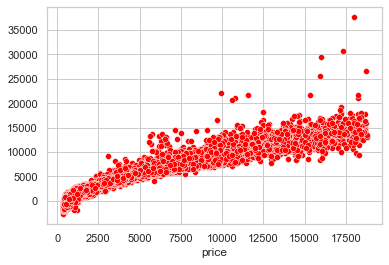

In [165]:
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="red")

*Random Forest Model*

In [166]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [167]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.72%
R squared of the Random Forest Regressor on test set: 98.09%


<AxesSubplot:xlabel='price'>

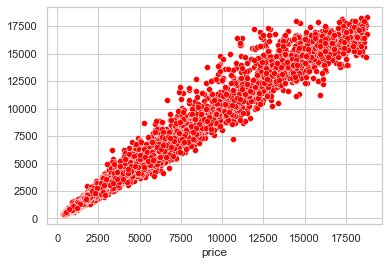

In [168]:
y_pred2 = rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred2, color="red")

### Evaluation

In [170]:
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
25180,2499,2586.029140,87.029140
5014,907,753.720345,-153.279655
20350,4989,6545.338440,1556.338440
8477,2033,2829.471241,796.471241
40347,3881,4377.753640,496.753640
...,...,...,...
20549,4308,5358.970563,1050.970563
42470,6856,7230.848780,374.848780
16736,1197,1278.037983,81.037983
32645,2274,2627.311720,353.311720


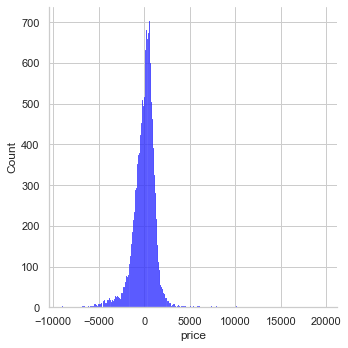

In [173]:
sb.displot(y_pred - y_test, color="blue")

In [177]:
import sklearn.metrics as mt
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mt.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error of the Linear Regression on test set is 859.80


"Our linear regression model was able to predict the price of every diamond in the test set with an error of ± $869.38 of the real price."